(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-10/notebook/code_demo.ipynb)

# Python Basics - Namespace

# From Last Class

## Hypothesis Test

wikipedia: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

`Hypothesis` is a statement about a parameter. A `hypothesis test` is a standard procedure to test a statement (the `hypothesis`), and typically we need to select between two complementary `hypothesis`:
* `Null hypothesis` ($H_0$): A statment about an established fact of a parameter. The null hypothesis is generally assumed to be true until evidence indicates otherwise (similar to the case that a defendant of a jury trial is presumed innocent until proven guilty). It is normally expressed as Math equation, and **it must contain a condition of equality, such as $=,\geq, \leq $**.
* `Alternative hypothesis` ($H_1$): A statement that the parameter has a value that differs from the null hypothesis.
 Needs a strong support from data to change our thinking and contradicts Ho. Expressed as Math statement it contains $\neq, <, >$.

We also need a `test statistic` (a quantity derived from the sample). Typically it is selected or defined in such a way as to quantify, within observed data, behaviours that would distinguish the `null` from the `alternative hypothesis`, where such an alternative is prescribed, or that would characterize the null hypothesis if there is no explicitly stated alternative hypothesis. Normally, we should have a good idea on the sampling distribution of the test statistic.
* List of commonly used `test statistic`: https://en.wikipedia.org/wiki/Test_statistic

| Null Hypothesis        | Alternative Hypothesis      | Type of Alternative |
|------------------------|-----------------------------|---------------------|
|                        | $H_1$: $\theta < \theta_0$    | lower one-sided     |
| $H_0$: $\theta=\theta_0$ | $H_1$: $\theta > \theta_0$    | upper one-sided     |
|                        | $H_1$: $\theta \neq \theta_0$ | two-sided           |

|                                   | $H_0$ is true (Truly not guilty) |    $H_1$ is true (Truly guilty)   |
|-----------------------------------|---------------------------|----------------------------|
|  Accept null hypothesis Acquittal |        Right decision       | Wrong decision **Type II Error** |
| Reject null hypothesis Conviction | Wrong decision **Type I Error** |        Right decision        |

### One Population Proportion

**Example: How to tell if a coin is fair?**

**Problem**: Suppose we tossed a coin 100 times and we have obtained 38
Heads and 62 Tails. Is the coin biased toward tails? 

$H_0$: $p_{head} = 0.5$

$H_1$: $p_{head} \neq 0.5$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p}-p_0}{SD(p_0)} \sim N(0,1)$ according to `central limit theorem`, where $SD(p_0) =\sqrt{\frac{p_0q_0}{n}} = \sqrt{\frac{p_0(1-p_0)}{n}} $.
![](https://www.investopedia.com/thmb/pF9cbALKXUA617NzyoKozi1B0rQ=/954x380/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-5c94e6b446e0fb00010ae8ed.jpg)

In [14]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
n = 100
p = 38/n
sd = (p*(1-p)/n)**0.5
z = (p-0.5)/sd

In [3]:
z

-2.4722569302909876

In [4]:
p = 2 * stats.norm.cdf(z) # two-sided

In [5]:
p

0.013426298293326975

In [6]:
stats.norm.ppf([0.025,0.975]) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.95996398,  1.95996398])

We can also do t-test: $t = \frac{\hat{p}-p_0}{SD(p_0)} \sim t_{n-1}$

In [7]:
p = 2 * stats.t.cdf(z, df = n-1) # two-sided
p

0.015131634778085726

In [8]:
stats.t.ppf([0.025,0.975], df=n-1) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.98421695,  1.98421695])

We can also use the `statsmodels` library to do the z-test

In [9]:
import statsmodels.api as sm

In [10]:
sm.stats.proportions_ztest(count=38,nobs=100,value=0.5,alternative='two-sided')

(-2.4722569302909876, 0.013426298293326975)

### Two Population Proportion Difference

**Problem**: A car manufacturer aims to improve the quality of the products by reducing the defects and also increase the customer satisfaction. Therefore, he monitors the efficiency of two assembly lines in the shop floor. In line A there are 18 defects reported out of 200 samples. While the line B shows 25 defects out of 600 cars. At α 5%, is the differences between two assembly procedures are significant?

$H_0$: $p_1 - p_2 = 0$

$H_1$: $p_1 - p_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p_1}-\hat{p_2} - 0}{SD} \sim N(0,1)$ according to `central limit theorem`, where $SD = \sqrt{p_0(1-p_0)(\frac{1}{n_1}+\frac{1}{n_2})}$, and $p_0 = \frac{x_1+x_2}{n_1+n_2}$.

In [11]:
import math

x1 = 18
n1 = 200
x2 = 25
n2 = 600

p1 = x1/n1
p2 = x2/n2
p0 = (x1+x2)/(n1+n2)
# sd = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
sd = math.sqrt(p0*(1-p0)*(1/n1 + 1/n2))
z = (p1-p2)/sd
z

2.624824049200042

In [12]:
p = 2 * (1-stats.norm.cdf(z)) # two-sided
p

0.008669375420073067

In [13]:
p1, p2

(0.09, 0.041666666666666664)

We can also use the `statsmodels` library to do the z-test

In [15]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='two-sided'
)

(2.624824049200042, 0.008669375420073044)

In [16]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='larger'
)

(2.624824049200042, 0.004334687710036522)

### One Population Mean

**Problem**: Your company wants to improve sales. Past sales data indicate that the average sale was \\$100 per transaction. After training your sales force, recent sales data (taken from a sample of 25 salesmen) indicates an average sale of \\$130, with a standard deviation of \\$15. Did the training work? Test your hypothesis at a 5\% alpha level.

$H_0$: $\mu = \mu_0$

$H_1$: $\mu \geq \mu_0$ (upper one-side)

Significance level $\alpha=0.05$

`z-test`: $z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim N(0,1)$, where $s$ is the sample standard deviation

`t-test`: $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t_{n-1}$, where $s$ is the sample standard deviation, and $n$ is the sample size

In [17]:
## z-test
mu0 = 100
xbar = 130
n = 25
s = 15

z = (xbar - mu0)/(s/math.sqrt(n))
z

10.0

In [18]:
p = 1-stats.norm.cdf(z)
p

0.0

In [19]:
## t-test
t = z
p = 1-stats.t.cdf(t, df=n-1)
p

2.457762882102088e-10

### Two Population Mean Difference

**Problem #1**: Does right‐ or left‐handedness affect how fast people type? Random samples of students from a typing class are given a typing speed test (words per minute), and the results are compared. Significance level for the test: 0.10. Because you are looking for a difference between the groups in either direction (right‐handed faster than left, or vice versa), this is a two‐tailed test.

| Group | Handedness | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Left       | 9  | 59.3      | 4.3 |
| 2     | Right      | 16 | 55.8      | 5.7 |

$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim t_{n_1+n_2-2}
$$
Here, $s_p$ is the pooled variance $s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$


In [ ]:
n1 = 9
n2 = 16

xbar1 = 59.3
xbar2 = 55.8

s1 = 4.3
s2 = 5.7

sp = math.sqrt(((n1-1)*(s1**2) + (n2-1)*(s2**2))/(n1+n2-2))
sp

In [ ]:
# z test
z = (xbar1 - xbar2)/(sp*math.sqrt(1/n1+1/n2))
z

In [ ]:
p = (1-stats.norm.cdf(z))*2
p

In [ ]:
## t-test
t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p

**Problem #2**: An experiment is conducted to determine whether intensive tutoring (covering a great deal of material in a fixed amount of time) is more effective than paced tutoring (covering less material in the same amount of time). Two randomly chosen groups are tutored separately and then administered proficiency tests. Use a significance level of α < 0.05.

| Group | Method | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Intensive       | 12  | 46.31      | 6.44 |
| 2     | Paced      | 10 | 42.79      | 7.52 |


$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim t_{n_1+n_2-2}
$$



In [ ]:
n1 = 12
n2 = 10

xbar1 = 46.31
xbar2 = 42.79

s1 = 6.44
s2 = 7.52

# z-test
z = (xbar1-xbar2)/math.sqrt(s1**2/n1 + s2**2/n2)
z

In [ ]:
p = (1-stats.norm.cdf(z))*2
p

In [ ]:
# t-test

t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p

# Time Series Data Operations

## Basic Python library - `datetime`

### timestamps and dates

In [1]:
import datetime

In [2]:
dts = datetime.datetime(year=2023,month=1,day=1,hour=0,minute=0,second=0)
dts

datetime.datetime(2023, 1, 1, 0, 0)

In [3]:
print(f"The year: {dts.year}")
print(f"The year: {dts.month}")
print(f"The year: {dts.day}")
print(f"The year: {dts.hour}")
print(f"The year: {dts.minute}")
print(f"The year: {dts.second}")

The year: 2023
The year: 1
The year: 1
The year: 0
The year: 0
The year: 0


In [4]:
dt = datetime.date(year=2023, month=1, day=1)
dt

datetime.date(2023, 1, 1)

In [5]:
ts = datetime.time(hour=0, minute=0, second=1)
ts

datetime.time(0, 0, 1)

| Type      | Description                                                                     |
|-----------|---------------------------------------------------------------------------------|
| date      | Store calendar date (year, month, day) using the Gregorian calendar             |
| time      | Store time of day as hours, minutes, seconds, and microseconds                  |
| datetime  | Store both date and time                                                        |
| timedelta | The difference between two datetime values (as days, seconds, and microseconds) |
| tzinfo    | Base type for storing time zone information                                     |

In [6]:
current_dts = datetime.datetime.now()
current_dts

datetime.datetime(2023, 10, 8, 14, 41, 14, 714995)

In [7]:
current_dt = datetime.datetime.now().date()
current_dt

datetime.date(2023, 10, 8)

In [8]:
current_dt = datetime.date.today()
current_dt

datetime.date(2023, 10, 8)

### time `delta`

```python
A timedelta object represents a duration, the difference between two dates or times.

class datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
```
[[Official Documentation](https://docs.python.org/3/library/datetime.html#timedelta-objects)]

In [9]:
delta = datetime.datetime.now.date() - datetime.datetime(2023,1,1)
delta

AttributeError: 'builtin_function_or_method' object has no attribute 'date'

In [10]:
delta = current_dt - datetime.datetime(2023,1,1)
delta

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'datetime.datetime'

In [11]:
delta = current_dt - datetime.date(2023,1,1)
delta

datetime.timedelta(days=280)

In [12]:
type(delta)

datetime.timedelta

In [13]:
print(f"Diff in days: {delta.days}")
print(f"Diff in seconds: {delta.seconds}")

Diff in days: 280
Diff in seconds: 0


### Conversion between `string` and `datetime`
`strftime()` vs. `strptime()`
[[Official Documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)]

In [14]:
dts = datetime.datetime(2023,1,1)
str(dts)

'2023-01-01 00:00:00'

In [15]:
dts.strftime('%Y-%m-%d')

'2023-01-01'

In [17]:
dts_str = '2023-01-01'
datetime.datetime.strptime(dts_str, '%Y-%m-%d')

datetime.datetime(2023, 1, 1, 0, 0)

In [20]:
import pandas as pd

dts_strs = ['2023-01-01 00:00:00', '2023-01-02 00:00:00', None]
pd.to_datetime(dts_strs)

DatetimeIndex(['2023-01-01', '2023-01-02', 'NaT'], dtype='datetime64[ns]', freq=None)

## `timeseries` in Pandas
Time series data could be represented as a Pandas `Series` with timestamp index values

In [21]:
import numpy as np

In [22]:
dates = [
    datetime.datetime(2023,1,1),
    datetime.datetime(2023,1,2),
    datetime.datetime(2023,1,3),
    datetime.datetime(2023,1,4),
    datetime.datetime(2023,1,5),
    datetime.datetime(2023,1,6)
]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [24]:
ts.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq=None)

In [29]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

`pandas.Timestamp` vs. `datetime.datetime`
```python
class pandas.Timestamp(ts_input=<object object>, year=None, month=None, day=None, hour=None, minute=None, second=None, microsecond=None, tzinfo=None, *, nanosecond=None, tz=None, unit=None, fold=None)
```
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. It’s the type used for the entries that make up a DatetimeIndex, and other timeseries oriented data structures in pandas.

[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas-timestamp)]

**ATTENTION**
</br>
</br>
A `pandas.Timestamp` can be substituted most places where you would use a `datetime` object. The reverse is not true, however, because `pandas.Timestamp` can store nanosecond precision data (pandas stores timestamps using NumPy’s `datetime64` data type at the nanosecond resolution), while `datetime` stores only up to `microseconds`. Additionally, `pandas.Timestamp` can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations.

In [31]:
ts.index[0]

Timestamp('2023-01-01 00:00:00')

In [28]:
ts[0:2]

2023-01-01    1.033219
2023-01-02   -0.604558
dtype: float64

In [26]:
ts[::2]

2023-01-01    1.033219
2023-01-03    1.046813
2023-01-05    0.165620
dtype: float64

Arithmetic operations between differently indexed time series automatically align on the dates:

In [25]:
ts + ts[::2]

2023-01-01    2.066438
2023-01-02         NaN
2023-01-03    2.093626
2023-01-04         NaN
2023-01-05    0.331240
2023-01-06         NaN
dtype: float64

### Create time series data out of a file

In [39]:
min_daily_temperature = pd.read_csv('../data/daily-min-temperatures.csv')
min_daily_temperature.head(3)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


In [41]:
# min_daily_temperature.set_index('Date')
min_daily_temperature.set_index('Date', inplace=True)
min_daily_temperature.head(3)


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [43]:
import matplotlib.pyplot as plt

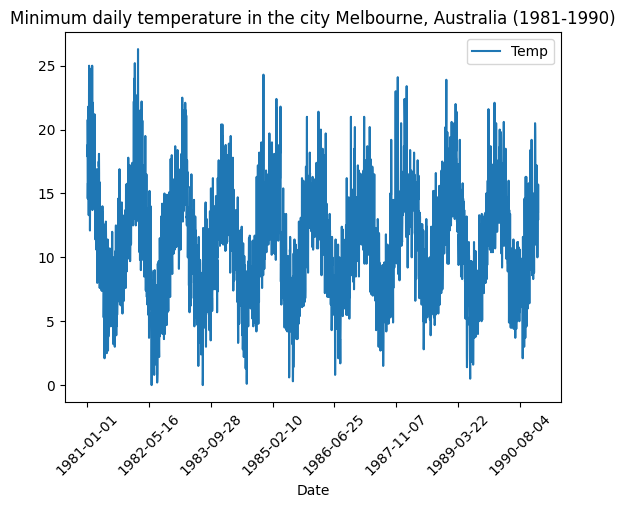

In [44]:
min_daily_temperature.plot(title='Minimum daily temperature in the city Melbourne, Australia (1981-1990)')
plt.xticks(rotation=45)
plt.show()

### Generate date ranges in Pandas

In [65]:
index = pd.date_range("2023-04-01", "2023-04-10", freq='D')
index

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10'],
              dtype='datetime64[ns]', freq='D')

In [66]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [69]:
#### By default the date_range() function generate daily timestamps
#### periods represents time spans
pd.date_range(start="2023-04-01", periods=20)

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20'],
              dtype='datetime64[ns]', freq='D')

* Available frequency string patterns https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects

In [70]:
pd.date_range("2023-01-01", "2023-06-01", freq="BM")

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [71]:
pd.date_range("2023-01-01", "2023-06-01", freq="W")

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02', '2023-04-09', '2023-04-16',
               '2023-04-23', '2023-04-30', '2023-05-07', '2023-05-14',
               '2023-05-21', '2023-05-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [74]:
#### By default, it keeps the timestamp part
pd.date_range("2023-04-01 12:56:31", periods=5)

DatetimeIndex(['2023-04-01 12:56:31', '2023-04-02 12:56:31',
               '2023-04-03 12:56:31', '2023-04-04 12:56:31',
               '2023-04-05 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [75]:
#### If you want to normalize to the midnight
pd.date_range("2023-04-01 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05'],
              dtype='datetime64[ns]', freq='D')

In [78]:
#### Customized frequency/offsets
pd.date_range("2023-01-01", "2023-01-03 23:59", freq="4H")

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 04:00:00',
               '2023-01-01 08:00:00', '2023-01-01 12:00:00',
               '2023-01-01 16:00:00', '2023-01-01 20:00:00',
               '2023-01-02 00:00:00', '2023-01-02 04:00:00',
               '2023-01-02 08:00:00', '2023-01-02 12:00:00',
               '2023-01-02 16:00:00', '2023-01-02 20:00:00',
               '2023-01-03 00:00:00', '2023-01-03 04:00:00',
               '2023-01-03 08:00:00', '2023-01-03 12:00:00',
               '2023-01-03 16:00:00', '2023-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [90]:
pd.date_range("2023-01-01", "2023-10-10 23:59", freq="2M")

DatetimeIndex(['2023-01-31', '2023-03-31', '2023-05-31', '2023-07-31',
               '2023-09-30'],
              dtype='datetime64[ns]', freq='2M')

In [91]:
pd.date_range("2023-01-01", "2023-10-10 23:59", freq="2MS")

DatetimeIndex(['2023-01-01', '2023-03-01', '2023-05-01', '2023-07-01',
               '2023-09-01'],
              dtype='datetime64[ns]', freq='2MS')

## Select time series data in Pandas

### Select by `Series` index/label

In [32]:
ts

2023-01-01    1.033219
2023-01-02   -0.604558
2023-01-03    1.046813
2023-01-04   -1.074005
2023-01-05    0.165620
2023-01-06    1.190591
dtype: float64

In [33]:
label = ts.index[1]
ts[label]

-0.6045575794136874

In [34]:
ts["2023-01-02"]

-0.6045575794136874

### Select by time slices
For longer time series, you could also use a year or a year and month string to select the corresponding slices of data

In [54]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range("2021-01-01", periods=1000))
longer_ts.head(3)

2021-01-01    0.663047
2021-01-02   -1.428849
2021-01-03    0.897028
Freq: D, dtype: float64

In [55]:
print(f"min_date: {longer_ts.index[0]}")
print(f"max_date: {longer_ts.index[-1]}")

min_date: 2021-01-01 00:00:00
max_date: 2023-09-27 00:00:00


In [56]:
longer_ts['2022'].head(3)

2022-01-01    1.176429
2022-01-02   -1.374061
2022-01-03   -1.150527
Freq: D, dtype: float64

In [57]:
longer_ts['2022-05'].head(3)

2022-05-01    0.038596
2022-05-02   -0.154975
2022-05-03    0.009415
Freq: D, dtype: float64

### Select by `datetime` values

In [58]:
longer_ts[datetime.datetime(2023,1,1)]

0.6211730207460737

In [59]:
ts_range = longer_ts[datetime.datetime(2023,1,1): datetime.datetime(2023,1,31)]
print(f"min_date: {ts_range.index[0]}")
print(f"max_date: {ts_range.index[-1]}")

min_date: 2023-01-01 00:00:00
max_date: 2023-01-31 00:00:00


### Select with `truncate()`

```python
Series.truncate(before=None, after=None, axis=None, copy=None)
```
Truncate a Series or DataFrame before and after some index value. This is a useful shorthand for boolean indexing based on index values above or below certain thresholds.


[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.truncate.html#pandas-series-truncate)]

In [61]:
longer_ts.truncate(before='2023-01-01', after='2023-01-05')

2023-01-01    0.621173
2023-01-02    1.200538
2023-01-03   -0.393135
2023-01-04   -1.105128
2023-01-05   -0.652792
Freq: D, dtype: float64

## Shift `time series`

### "Naive" shifts

In [81]:
ts = pd.Series(np.random.randn(10), index=pd.date_range('2023-01-01', periods=10, freq='M'))
ts

2023-01-31   -1.471054
2023-02-28   -1.225073
2023-03-31   -0.465266
2023-04-30    0.031127
2023-05-31    0.867263
2023-06-30    0.991432
2023-07-31   -0.101687
2023-08-31    0.087047
2023-09-30   -2.409025
2023-10-31   -0.101804
Freq: M, dtype: float64

In [82]:
ts.shift(2)

2023-01-31         NaN
2023-02-28         NaN
2023-03-31   -1.471054
2023-04-30   -1.225073
2023-05-31   -0.465266
2023-06-30    0.031127
2023-07-31    0.867263
2023-08-31    0.991432
2023-09-30   -0.101687
2023-10-31    0.087047
Freq: M, dtype: float64

In [83]:
ts.shift(-2)

2023-01-31   -0.465266
2023-02-28    0.031127
2023-03-31    0.867263
2023-04-30    0.991432
2023-05-31   -0.101687
2023-06-30    0.087047
2023-07-31   -2.409025
2023-08-31   -0.101804
2023-09-30         NaN
2023-10-31         NaN
Freq: M, dtype: float64

### Compute consecutive % changes

In [84]:
ts / ts.shift(1) - 1

2023-01-31          NaN
2023-02-28    -0.167214
2023-03-31    -0.620214
2023-04-30    -1.066902
2023-05-31    26.861817
2023-06-30     0.143174
2023-07-31    -1.102566
2023-08-31    -1.856032
2023-09-30   -28.674913
2023-10-31    -0.957741
Freq: M, dtype: float64

### Shift based on frequency

In [86]:
ts

2023-01-31   -1.471054
2023-02-28   -1.225073
2023-03-31   -0.465266
2023-04-30    0.031127
2023-05-31    0.867263
2023-06-30    0.991432
2023-07-31   -0.101687
2023-08-31    0.087047
2023-09-30   -2.409025
2023-10-31   -0.101804
Freq: M, dtype: float64

In [87]:
ts.shift(2, freq='M')

2023-03-31   -1.471054
2023-04-30   -1.225073
2023-05-31   -0.465266
2023-06-30    0.031127
2023-07-31    0.867263
2023-08-31    0.991432
2023-09-30   -0.101687
2023-10-31    0.087047
2023-11-30   -2.409025
2023-12-31   -0.101804
Freq: M, dtype: float64

In [88]:
ts.shift(3, freq="D")

2023-02-03   -1.471054
2023-03-03   -1.225073
2023-04-03   -0.465266
2023-05-03    0.031127
2023-06-03    0.867263
2023-07-03    0.991432
2023-08-03   -0.101687
2023-09-03    0.087047
2023-10-03   -2.409025
2023-11-03   -0.101804
dtype: float64

In [89]:
ts.shift(1, freq="90T")

2023-01-31 01:30:00   -1.471054
2023-02-28 01:30:00   -1.225073
2023-03-31 01:30:00   -0.465266
2023-04-30 01:30:00    0.031127
2023-05-31 01:30:00    0.867263
2023-06-30 01:30:00    0.991432
2023-07-31 01:30:00   -0.101687
2023-08-31 01:30:00    0.087047
2023-09-30 01:30:00   -2.409025
2023-10-31 01:30:00   -0.101804
dtype: float64

## Resampling

`Resampling` refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called `downsampling`, while converting lower frequency to higher frequency is called `upsampling`.

```python
Series.resample(rule, axis=_NoDefault.no_default, closed=None, label=None, convention='start', kind=None, on=None, level=None, origin='start_day', offset=None, group_keys=False)
```
- Resample time-series data.
- Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html#pandas.Series.resample)]

### `Downsampling`

In [112]:
index = pd.date_range('1/1/2023', periods=9, freq='T')
series = pd.Series(range(1,10), index=index)
series

2023-01-01 00:00:00    1
2023-01-01 00:01:00    2
2023-01-01 00:02:00    3
2023-01-01 00:03:00    4
2023-01-01 00:04:00    5
2023-01-01 00:05:00    6
2023-01-01 00:06:00    7
2023-01-01 00:07:00    8
2023-01-01 00:08:00    9
Freq: T, dtype: int64

In [113]:
# Downsample the series into 3 minute bins and sum the values of the timestamps falling into a bin.

series.resample('3T').sum()

2023-01-01 00:00:00     6
2023-01-01 00:03:00    15
2023-01-01 00:06:00    24
Freq: 3T, dtype: int64

In [114]:
# Downsample the series into 3 minute bins as above, but label each bin using the right edge instead of the left.
# Please note that the value in the bucket used as the label is not included in the bucket, which it labels.

series.resample('3T', label='right').sum()

# By default, the left boundary of the bucket is inclusive, the right boundary of the bucket is exclusive

2023-01-01 00:03:00     6
2023-01-01 00:06:00    15
2023-01-01 00:09:00    24
Freq: 3T, dtype: int64

In [115]:
# To include the right boundary of the bin interval
series.resample('3T', label='right', closed='right').sum()

2023-01-01 00:00:00     1
2023-01-01 00:03:00     9
2023-01-01 00:06:00    18
2023-01-01 00:09:00    17
Freq: 3T, dtype: int64

### `Upsampling`

In [117]:
series.resample('30S').asfreq()


2023-01-01 00:00:00    1.0
2023-01-01 00:00:30    NaN
2023-01-01 00:01:00    2.0
2023-01-01 00:01:30    NaN
2023-01-01 00:02:00    3.0
2023-01-01 00:02:30    NaN
2023-01-01 00:03:00    4.0
2023-01-01 00:03:30    NaN
2023-01-01 00:04:00    5.0
2023-01-01 00:04:30    NaN
2023-01-01 00:05:00    6.0
2023-01-01 00:05:30    NaN
2023-01-01 00:06:00    7.0
2023-01-01 00:06:30    NaN
2023-01-01 00:07:00    8.0
2023-01-01 00:07:30    NaN
2023-01-01 00:08:00    9.0
Freq: 30S, dtype: float64

```python
Series.ffill(*, axis=None, inplace=False, limit=None, downcast=_NoDefault.no_default)
```
- Fill NA/NaN values by propagating the last valid observation to next valid.
[[Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.ffill.html#pandas-series-ffill)]

In [119]:
# Upsample the series into 30 second bins and fill the NaN values using the ffill method.
series.resample('30S').ffill().head(10)

2023-01-01 00:00:00    1
2023-01-01 00:00:30    1
2023-01-01 00:01:00    2
2023-01-01 00:01:30    2
2023-01-01 00:02:00    3
2023-01-01 00:02:30    3
2023-01-01 00:03:00    4
2023-01-01 00:03:30    4
2023-01-01 00:04:00    5
2023-01-01 00:04:30    5
Freq: 30S, dtype: int64

In [120]:
# Upsample the series into 30 second bins and fill the NaN values using the bfill method.

series.resample('30S').bfill().head(10)

2023-01-01 00:00:00    1
2023-01-01 00:00:30    2
2023-01-01 00:01:00    2
2023-01-01 00:01:30    3
2023-01-01 00:02:00    3
2023-01-01 00:02:30    4
2023-01-01 00:03:00    4
2023-01-01 00:03:30    5
2023-01-01 00:04:00    5
2023-01-01 00:04:30    6
Freq: 30S, dtype: int64

### Resample with customized logic

In [121]:
series.resample('3T').apply(lambda x: np.sum(x) + 5)

2023-01-01 00:00:00    11
2023-01-01 00:03:00    20
2023-01-01 00:06:00    29
Freq: 3T, dtype: int64

### Other resampling examples - `PeriodIndex`

In [122]:
s = pd.Series(range(1,5), index=pd.period_range('2012-01-01', freq='A', periods=4))
s

2012    1
2013    2
2014    3
2015    4
Freq: A-DEC, dtype: int64

In [123]:
s.resample('Q').asfreq()

2012Q1    1.0
2012Q2    NaN
2012Q3    NaN
2012Q4    NaN
2013Q1    2.0
2013Q2    NaN
2013Q3    NaN
2013Q4    NaN
2014Q1    3.0
2014Q2    NaN
2014Q3    NaN
2014Q4    NaN
2015Q1    4.0
2015Q2    NaN
2015Q3    NaN
2015Q4    NaN
Freq: Q-DEC, dtype: float64

In [124]:
s.resample('Q', convention='end').asfreq()

2012Q4    1.0
2013Q1    NaN
2013Q2    NaN
2013Q3    NaN
2013Q4    2.0
2014Q1    NaN
2014Q2    NaN
2014Q3    NaN
2014Q4    3.0
2015Q1    NaN
2015Q2    NaN
2015Q3    NaN
2015Q4    4.0
Freq: Q-DEC, dtype: float64

In [126]:
q = pd.Series(range(1,5), index=pd.period_range('2012-01-01', freq='Q', periods=4))
q

2012Q1    1
2012Q2    2
2012Q3    3
2012Q4    4
Freq: Q-DEC, dtype: int64

In [127]:
q.resample('M', convention='end').asfreq()

2012-03    1.0
2012-04    NaN
2012-05    NaN
2012-06    2.0
2012-07    NaN
2012-08    NaN
2012-09    3.0
2012-10    NaN
2012-11    NaN
2012-12    4.0
Freq: M, dtype: float64

### On `DataFrame` objects

In [128]:
d = {'price': [10, 11, 9, 13, 14, 18, 17, 19],
      'volume': [50, 60, 40, 100, 50, 100, 40, 50]}
df = pd.DataFrame(d)
df['week_starting'] = pd.date_range('01/01/2018',
                                     periods=8,
                                     freq='W')
df

,price,volume,week_starting
0,10,50,2018-01-07
1,11,60,2018-01-14
2,9,40,2018-01-21
3,13,100,2018-01-28
4,14,50,2018-02-04
5,18,100,2018-02-11
6,17,40,2018-02-18
7,19,50,2018-02-25


In [131]:
df.resample('M', on='week_starting').mean()

,price,volume
week_starting,,
2018-01-31,10.75,62.5
2018-02-28,17.00,60.0


In [132]:
start, end = '2000-10-01 23:30:00', '2000-10-02 00:30:00'
rng = pd.date_range(start, end, freq='7min')
ts = pd.Series(np.arange(len(rng)) * 3, index=rng)
ts

2000-10-01 23:30:00     0
2000-10-01 23:37:00     3
2000-10-01 23:44:00     6
2000-10-01 23:51:00     9
2000-10-01 23:58:00    12
2000-10-02 00:05:00    15
2000-10-02 00:12:00    18
2000-10-02 00:19:00    21
2000-10-02 00:26:00    24
Freq: 7T, dtype: int64

In [133]:
ts.resample('17min').sum()

2000-10-01 23:14:00     0
2000-10-01 23:31:00     9
2000-10-01 23:48:00    21
2000-10-02 00:05:00    54
2000-10-02 00:22:00    24
Freq: 17T, dtype: int64

In [134]:
ts.resample('17min', origin='start').sum()

2000-10-01 23:30:00     9
2000-10-01 23:47:00    21
2000-10-02 00:04:00    54
2000-10-02 00:21:00    24
Freq: 17T, dtype: int64

In [135]:
ts.resample('17min', origin='end').sum()

2000-10-01 23:35:00     0
2000-10-01 23:52:00    18
2000-10-02 00:09:00    27
2000-10-02 00:26:00    63
Freq: 17T, dtype: int64

## Moving window functions

In [138]:
close_px_all = pd.read_csv("../data/stock_px.csv", parse_dates=True, index_col=0)

In [140]:
close_px_all.shape

(2214, 4)

In [143]:
close_px_all.head(100)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2003-05-20,8.90,19.42,29.50,919.73
2003-05-21,8.93,18.94,29.89,923.42
2003-05-22,9.12,19.05,30.02,931.87
2003-05-23,9.16,19.09,30.05,933.22


In [141]:
close_px_all.tail(5)

,AAPL,MSFT,XOM,SPX
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


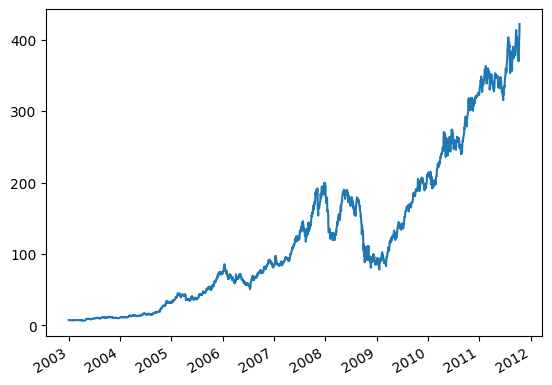

In [144]:
close_px_all["AAPL"].plot()
plt.show()

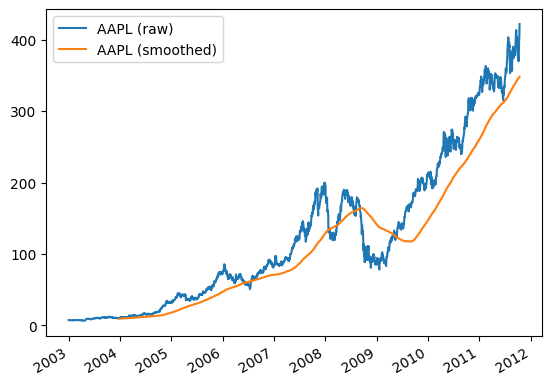

In [147]:
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(250).mean().plot(label='AAPL (smoothed)')
plt.legend()
plt.show()

The expression `rolling(250)` is similar in behavior to `groupby`, but instead of grouping, it creates an object that enables grouping over a **250-day sliding window**. So here we have the 250-day moving window average of Apple’s stock price.

In [148]:
close_px_all["AAPL"].pct_change()

2003-01-02         NaN
2003-01-03    0.006757
2003-01-06    0.000000
2003-01-07   -0.002685
2003-01-08   -0.020188
                ...   
2011-10-10    0.051406
2011-10-11    0.029526
2011-10-12    0.004747
2011-10-13    0.015515
2011-10-14    0.033225
Name: AAPL, Length: 2214, dtype: float64

In [157]:
pd.set_option('display.max_rows', None)
close_px_all["AAPL"].pct_change().rolling(250).std().head(20)

2003-01-02   NaN
2003-01-03   NaN
2003-01-06   NaN
2003-01-07   NaN
2003-01-08   NaN
2003-01-09   NaN
2003-01-10   NaN
2003-01-13   NaN
2003-01-14   NaN
2003-01-15   NaN
2003-01-16   NaN
2003-01-17   NaN
2003-01-21   NaN
2003-01-22   NaN
2003-01-23   NaN
2003-01-24   NaN
2003-01-27   NaN
2003-01-28   NaN
2003-01-29   NaN
2003-01-30   NaN
Name: AAPL, dtype: float64

In [159]:
std250 = close_px_all["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250.head(20)


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
2003-01-21    0.013181
2003-01-22    0.012713
2003-01-23    0.014114
2003-01-24    0.014929
2003-01-27    0.016163
2003-01-28    0.017672
2003-01-29    0.018161
2003-01-30    0.020128
Name: AAPL, dtype: float64

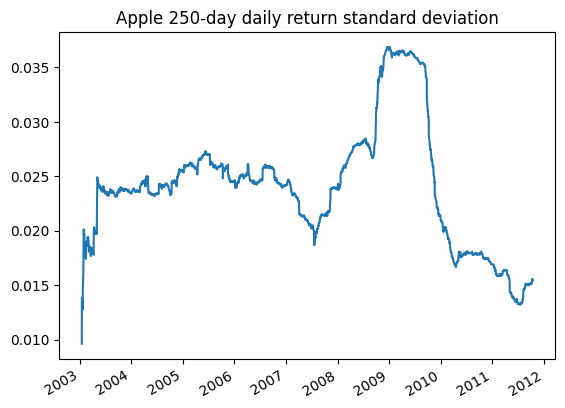

In [161]:
std250.plot()
plt.title("Apple 250-day daily return standard deviation")
plt.show()

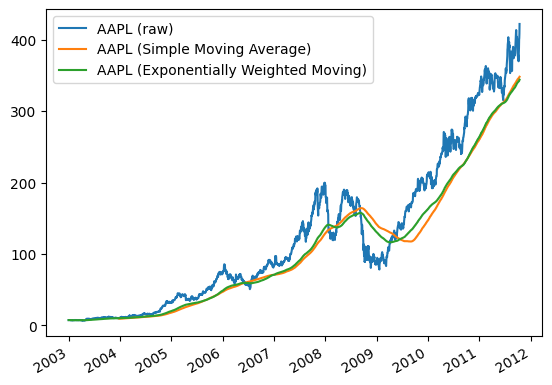

In [163]:
# Rolling with exponentially weighted function
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(250).mean().plot(label='AAPL (Simple Moving Average)')
close_px_all["AAPL"].ewm(span=250).mean().plot(label='AAPL (Exponentially Weighted Moving)')
plt.legend()
plt.show()

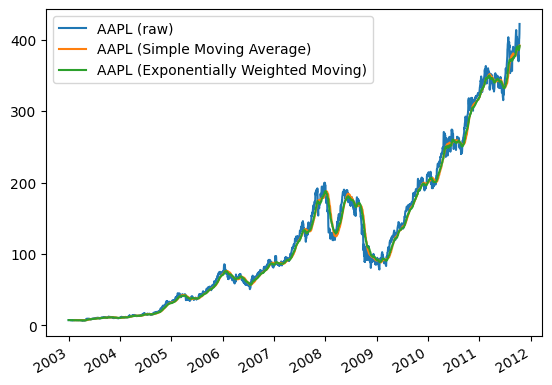

In [164]:
# Rolling with exponentially weighted function
close_px_all["AAPL"].plot(label='AAPL (raw)')
close_px_all["AAPL"].rolling(30).mean().plot(label='AAPL (Simple Moving Average)')
close_px_all["AAPL"].ewm(span=30).mean().plot(label='AAPL (Exponentially Weighted Moving)')
plt.legend()
plt.show()

# Explore AAPL historical stock data
- Data source: https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices
- Content
    - `Date`: The date is in the format yy-mm-dd
    - `Open`: Price of the stock when the market opens
    - `High`: Highest price reached in the day
    - `Low`: Lowest price reached in the day
    - `Close`: Price of the stock when the market closes
    - `Volume`: Number of shares traded in a day
    - `Dividends`: The dividends of the stock
    - `Stock Splits`: The stock splits of the company. In a stock split, a company divides its existing stock into multiple shares to boost liquidity.

## Ingest the data

In [165]:
df = pd.read_csv('../data/AAPL.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 0 to 10482
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10483 non-null  object 
 1   Open          10483 non-null  float64
 2   High          10483 non-null  float64
 3   Low           10483 non-null  float64
 4   Close         10483 non-null  float64
 5   Volume        10483 non-null  int64  
 6   Dividends     10483 non-null  float64
 7   Stock Splits  10483 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 655.3+ KB


In [167]:
df['Date'] = df['Date'].map(pd.to_datetime)
df.set_index('Date', inplace=True)
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0


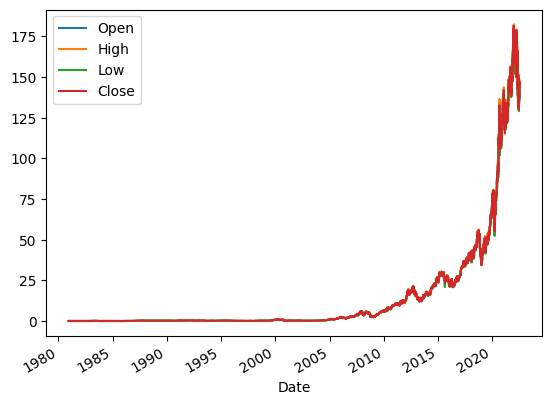

In [168]:
df['Open'].plot(label='Open')
df['High'].plot(label='High')
df['Low'].plot(label='Low')
df['Close'].plot(label='Close')
plt.legend()
plt.show()

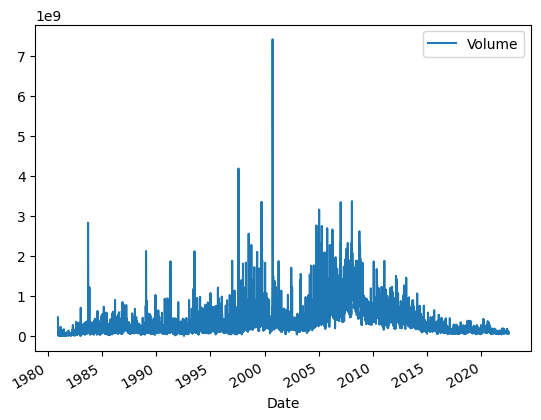

In [171]:
df['Volume'].plot(label='Volume')
plt.legend()
plt.show()

In [169]:
print(df.index.min())
print(df.index.max())

1980-12-12 00:00:00
2022-07-12 00:00:00


In [170]:
# Earliest date index location
print('Earliest date index location is: ',df.index.argmin())

# Latest date location
print('Latest date location: ',df.index.argmax())

Earliest date index location is:  0
Latest date location:  10482


## Visualization

In [172]:
df_past_5yr = df['2017-01':'2022-01']
df_past_5yr.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,27.175510,27.299888,26.931447,27.257647,115127600,0.0,0.0
2017-01-04,27.187244,27.342131,27.163777,27.227139,84472400,0.0,0.0
2017-01-05,27.203668,27.424264,27.177853,27.365595,88774400,0.0,0.0


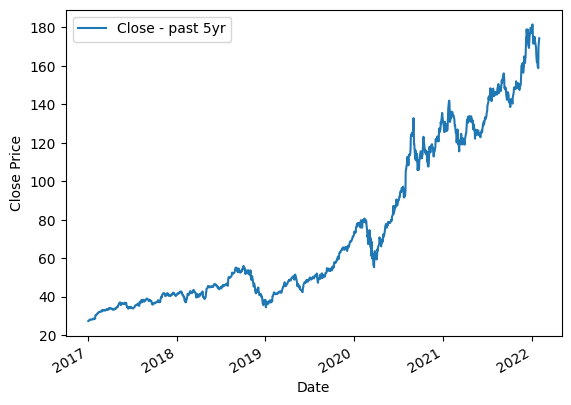

In [173]:
df_past_5yr.Close.plot(label='Close - past 5yr')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [175]:
df_2020 = df.loc['2020',]
df_2020.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,72.776219,73.847328,72.518272,73.785912,135480400,0.0,0.0
2020-01-03,72.999771,73.842405,72.840090,73.068558,146322800,0.0,0.0
2020-01-06,72.174345,73.690103,71.918850,73.650795,118387200,0.0,0.0


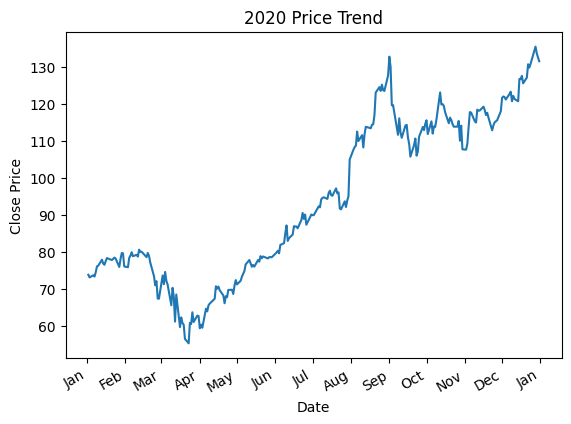

In [176]:
import matplotlib.dates as mdates
ax = df_2020.Close.plot()
ax.set_title('2020 Price Trend') 
ax.set_ylabel('Close Price')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

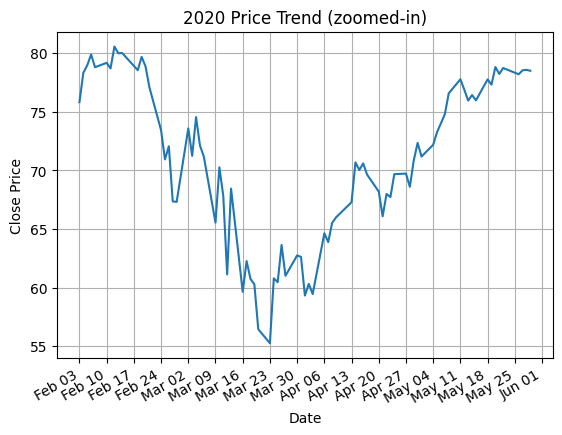

In [180]:
ax = df_2020.loc['2020-02':'2020-05'].Close.plot()
ax.set_title('2020 Price Trend (zoomed-in)') 
ax.set_ylabel('Close Price')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid()
plt.show()

## Seasonality decomposition

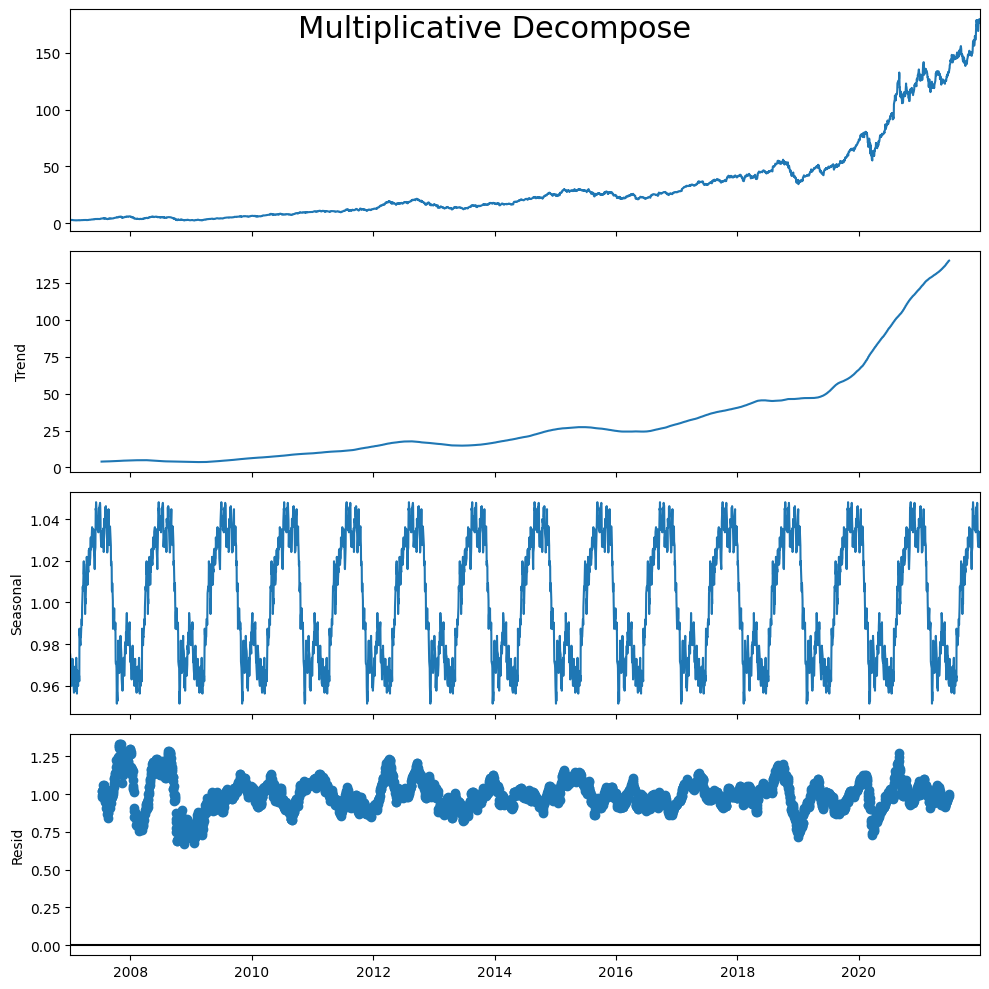

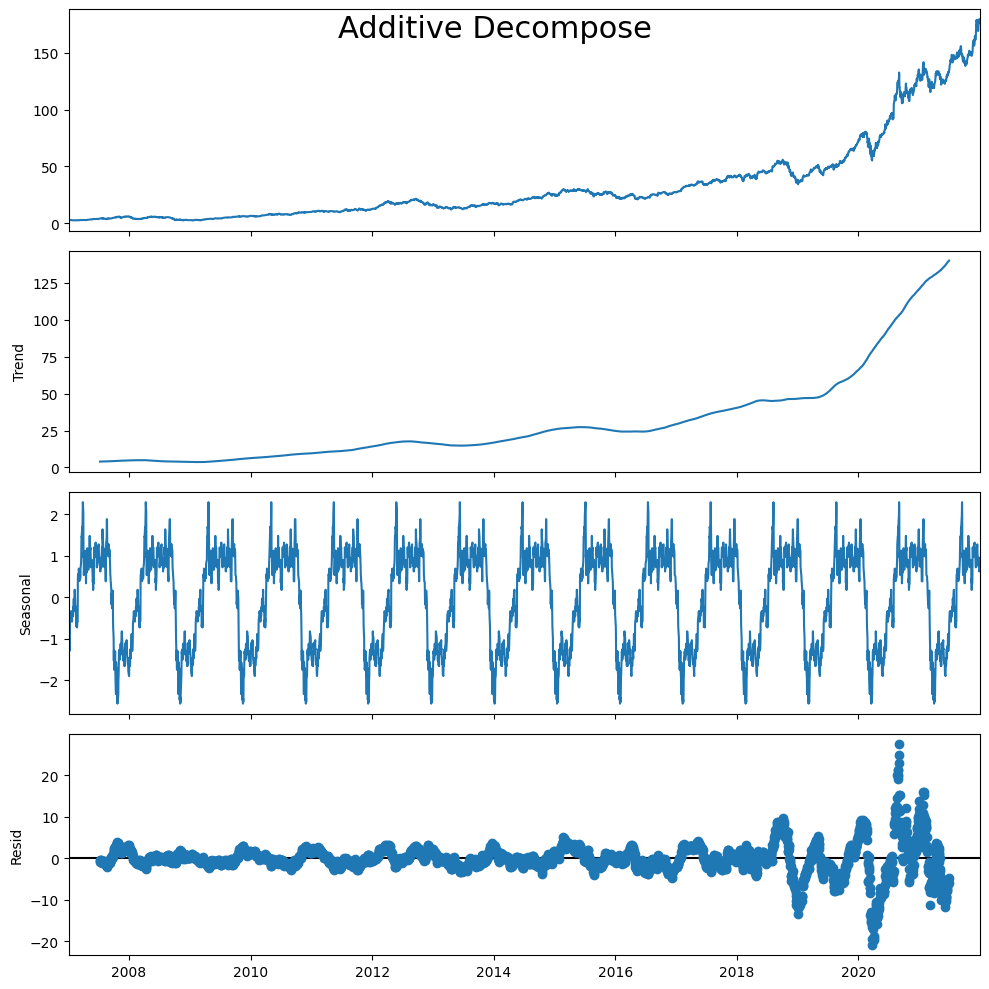

In [191]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

y = df.loc['2007':'2021', ['Close']]

# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 260)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 260)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [193]:
## Extract the components

df_decomposed = pd.concat(
    [
        result_mul.seasonal,
        result_mul.trend,
        result_mul.resid,
        result_mul.observed
    ],
    axis=1
)

df_decomposed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_decomposed.tail(10)

,seas,trend,resid,actual_values
Date,,,,
2021-12-17,1.032215,NaN,NaN,170.671478
2021-12-20,1.026686,NaN,NaN,169.285278
2021-12-21,1.031061,NaN,NaN,172.516403
2021-12-22,1.033091,NaN,NaN,175.159149
2021-12-23,1.034067,NaN,NaN,175.797409
2021-12-27,1.032808,NaN,NaN,179.836319
2021-12-28,1.032464,NaN,NaN,178.799149
2021-12-29,1.026485,NaN,NaN,178.888916
2021-12-30,1.029504,NaN,NaN,177.712143


## Feature Extraction

In [205]:
df_close = df.loc[:,['Close']]

df_close.reset_index(inplace=True)
df_close['year'] = df_close.Date.dt.year
df_close['month'] = df_close.Date.dt.month
df_close['day'] = df_close.Date.dt.day
df_close['day of week'] = df_close.Date.dt.dayofweek # The day of the week with Monday=0, Sunday=6.
df_close['Weekday Name'] = df_close.Date.dt.day_name()


#Set Date column as the index column.
df_close.set_index('Date', inplace=True)

df_close.head(3)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,0.100178,1980,12,12,4,Friday
1980-12-15,0.094952,1980,12,15,0,Monday
1980-12-16,0.087983,1980,12,16,1,Tuesday


## Resampling

In [210]:
df_close.Close.resample(rule = 'A').mean().head(5)

Date
1980-12-31    0.106075
1981-12-31    0.084724
1982-12-31    0.066703
1983-12-31    0.130561
1984-12-31    0.093390
Freq: A-DEC, Name: Close, dtype: float64

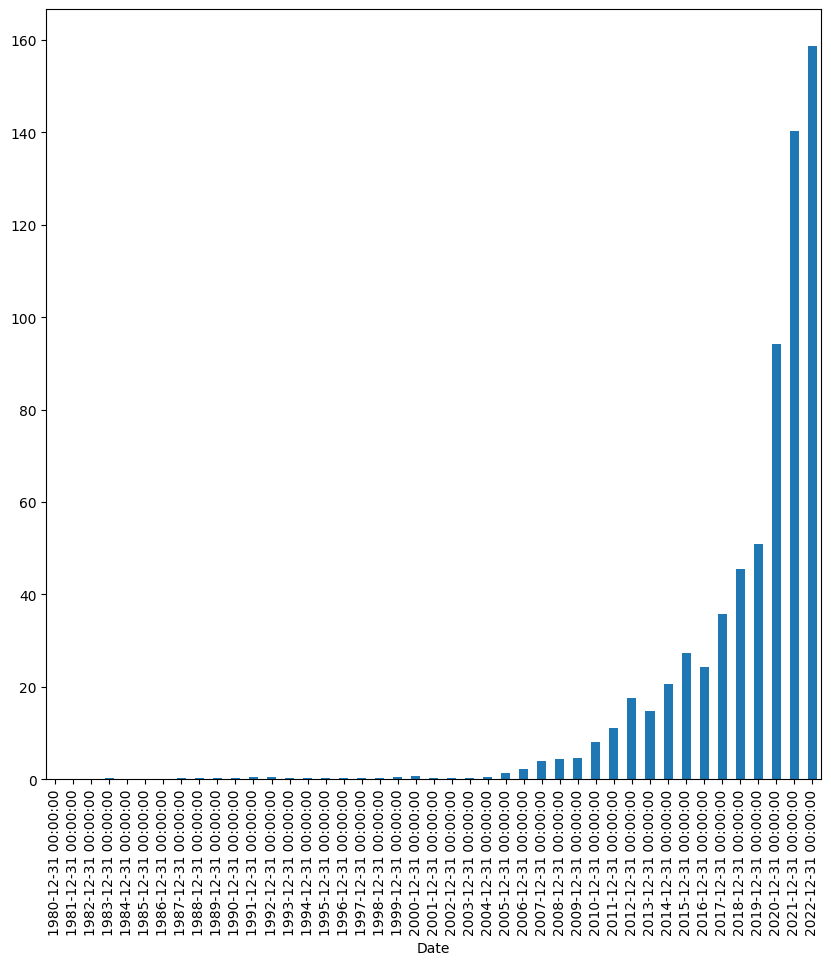

In [211]:
df_close.Close.resample(rule = 'A').mean().plot(kind='bar')
plt.show()

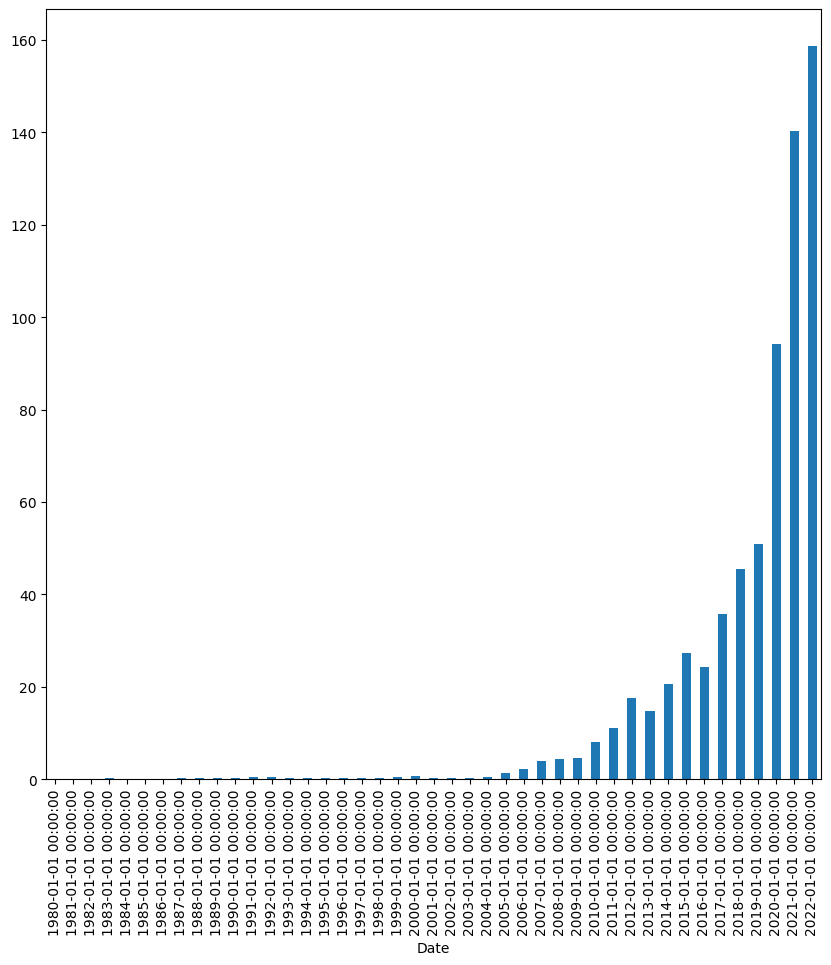

In [212]:
df_close.Close.resample(rule = 'AS').mean().plot(kind='bar')
plt.show()

## Time Shifting

In [214]:
df_close.shift(1).head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,None
1980-12-15,0.100178,1980.0,12.0,12.0,4.0,Friday
1980-12-16,0.094952,1980.0,12.0,15.0,0.0,Monday
1980-12-17,0.087983,1980.0,12.0,16.0,1.0,Tuesday
1980-12-18,0.090160,1980.0,12.0,17.0,2.0,Wednesday


In [215]:
df_close.shift(-1).head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,0.094952,1980.0,12.0,15.0,0.0,Monday
1980-12-15,0.087983,1980.0,12.0,16.0,1.0,Tuesday
1980-12-16,0.090160,1980.0,12.0,17.0,2.0,Wednesday
1980-12-17,0.092774,1980.0,12.0,18.0,3.0,Thursday
1980-12-18,0.098436,1980.0,12.0,19.0,4.0,Friday


In [216]:
df_close.shift(periods=1, freq='M').head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-31,0.100178,1980,12,12,4,Friday
1980-12-31,0.094952,1980,12,15,0,Monday
1980-12-31,0.087983,1980,12,16,1,Tuesday
1980-12-31,0.090160,1980,12,17,2,Wednesday
1980-12-31,0.092774,1980,12,18,3,Thursday


## Rolling Window

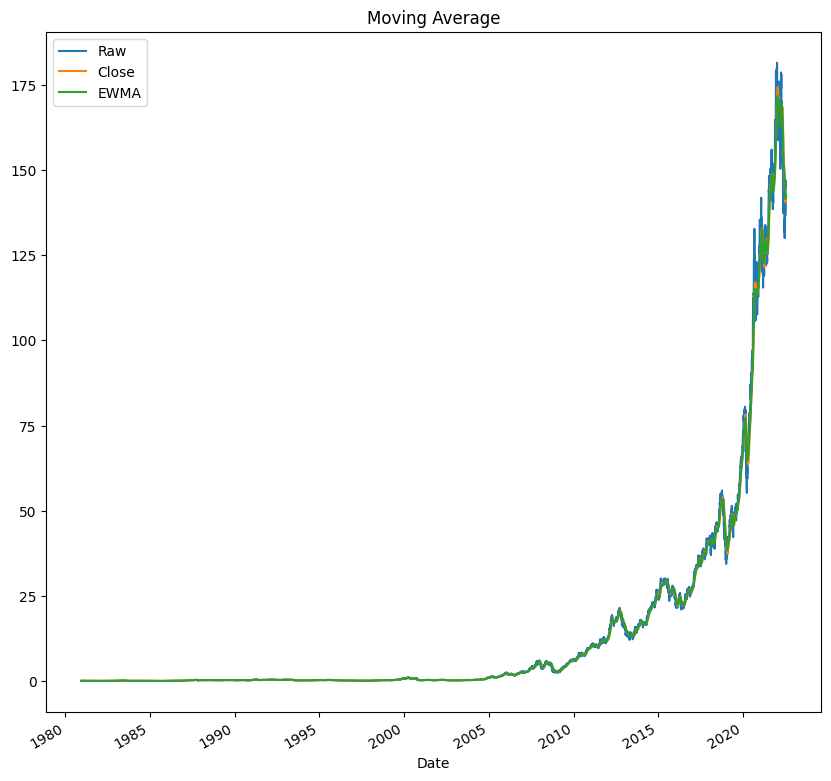

In [220]:
df_close.Close.plot(label='Raw')
df_close.Close.rolling(window=30).mean().plot(title='Moving Average')
df_close.Close.ewm(span=30).mean().plot(label='EWMA')
plt.legend()
plt.show()